In [1]:
import numpy as np
import helperfunctions as hf
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

%matplotlib inline
%load_ext autotime
#%autoload

time: 262 µs (started: 2021-01-19 08:04:56 -05:00)


# Model

In [2]:

config= {"input_lower_bound": -4.0,
         "input_uper_bound": np.reshape(4.0,[1,1]),
         "input_dim":4,
         "output_dim":1,
         "hidden1": 28,#28,
         "hidden2": 15,#15,
         "hidden3": 1, 
         "lr":0.001,
         "batch_size" : 1000,
         "epochs": 1000,
         "iters": 100,
         "drop1":0.5,
         "drop2":0.5,
         "print_it": True,
         "display_interval": 20,
         "vector": [1,1,1,1],
         "liml": [-200.,0.,4.],
         "limu" : [0.,4.,200.]
         
    }



time: 574 µs (started: 2021-01-19 08:04:56 -05:00)


In [3]:
file=['NNdataMPCrandom.csv','NNdataMPC2.csv']
regions=4#int(np.size(config["limu"]))#4
load_weights = True
#load_weights=False

model,crit, min_data, max_data =hf.main_cell(regions,file, config, 
                                             load_weights=load_weights, 
                                             test_size=0.05, density=True,
                                             select_interv=False, datn=[])
if load_weights:
    for j in range(regions):
        filename= 'MPC_model_weight_region_density'+str(j+1)
        model['region'+str(j+1)].load_state_dict(torch.load(filename))

Input Dimensions :  (35000, 4)
Output Dimensions :  (35000, 1)
data loaded successfully
succesfully assigned regions
succesfully assigned data to each region
data size for region : 0 torch.Size([8750, 4])
max value for region: 0 : 13.068592071533203
min value for region: 0 : 3.141336441040039
training for region  0  complete
data size for region : 1 torch.Size([8750, 4])
max value for region: 1 : 3.1413357257843018
min value for region: 1 : 0.9033691883087158
training for region  1  complete
data size for region : 2 torch.Size([8750, 4])
max value for region: 2 : 0.903044581413269
min value for region: 2 : -0.6348904967308044
training for region  2  complete
data size for region : 3 torch.Size([8750, 4])
max value for region: 3 : -0.6350257396697998
min value for region: 3 : -8.09624195098877
training for region  3  complete
time: 291 ms (started: 2021-01-19 08:04:57 -05:00)


Input Dimensions :  (35000, 4)
Output Dimensions :  (35000, 1)


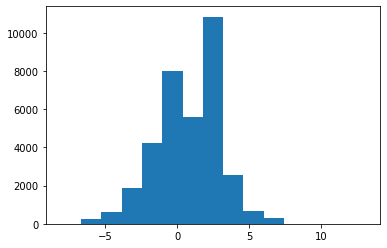

time: 357 ms (started: 2021-01-19 08:05:03 -05:00)


In [4]:
data_new,data,labels=hf.plotdata(file)
plt.hist(data_new,15)
plt.show()

In [5]:
print('min value of sum of the total data: ', min_data)
print('max value of sum of the total data: ', max_data)

min value of sum of the total data:  {'region1': 3.141336441040039, 'region2': 0.9033691883087158, 'region3': -0.6348904967308044, 'region4': -8.09624195098877}
max value of sum of the total data:  {'region1': 13.068592071533203, 'region2': 3.1413357257843018, 'region3': 0.903044581413269, 'region4': -0.6350257396697998}
time: 593 µs (started: 2021-01-19 08:05:06 -05:00)


# Cartpole Configuration and Visualization

In [16]:
config3 = {"l": 1, # length of the pendulum
         "mp": 0.2, # mass of the pendulum
         "Mc": 1, # Mass of the cart
         "g": 9.81, # gravity
         "dt":0.09, # time step for MPC
         "Np": 22, #Horizn length
         "cart" : (0.6,0.2), # dimensions of the cart
         "iters" : 150, # Maximum number of iteration for the solution
         "q11": 12., # state coefficient diag_1
         "q22": 0.09, # diag_2
         "q33": 2., # diag_3
         "q44": 0.1, # diag_3
         "R" : 0.3, # Input Coefficient
         "vector": [1,1,1,1]
         }


time: 596 µs (started: 2021-01-19 08:05:26 -05:00)


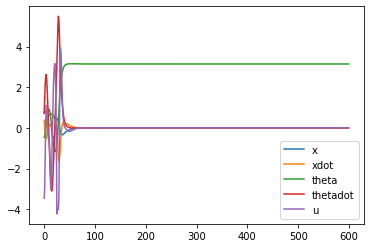

time: 328 ms (started: 2021-01-19 08:05:26 -05:00)


In [17]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
max_iter=600
history_q,history_u=hf.histories(max_iter, regions,max_data, min_data, model,config3, plot=True, sim=False)


In [11]:
print(history_q[0])

[-0.10647225 -1.706314   -3.6617024  -1.1117885 ]
time: 823 µs (started: 2021-01-19 08:05:18 -05:00)


In [ ]:
print(history_q[0])

In [ ]:
print(history_q[0])

In [ ]:
print(history_q[0])

# Plotting data for dimensions

In [ ]:
sl = [-200,-4,-3,-2,-1,0,1,2,3,4]
su = [-4,-3,-2,-1,0,1,2,3,4,200]
#for j in range(regions):
#    modelr = model['region'+str(j+1)]
#    filename = 'MPC_model_weight_region_density'+str(j+1)
#    torch.save(modelr.state_dict(), filename)
#NN.load_state_dict(torch.load('MPC_model_weights'))
#NN.eval()

In [ ]:
filenames =['NNdataMPC.csv','NNdataMPC2.csv']
cm = hf.plot_dimensions(sl,su,filenames, model ,regions, max_data, min_data, 
                     plot_num=False, plot_loss=False, plot_std=False)

In [ ]:
f=['NNdataMPCrandom.csv','NNdataMPC2.csv']
cm = hf.plot_dimensions(sl,su,f, model ,regions, max_data, min_data, 
                     plot_num=True, plot_loss=True, plot_std=False)